#### DATASET COLUMNS FEATURE EXPLAIN
* Age (age in years)
* Sex (1 = male; 0 = female)
* CP (chest pain type) displays the type of chest-pain experienced by the individual using the following format :
    - 0 - status at least
    - 1 - condition slightly distressed
    - 2 - condition medium problem
    - 3 - condition too bad
* TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))
* CHOL (serum cholestoral in mg/dl)
* FPS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* RESTECH (resting electrocardiographic results)
* THALACH (maximum heart rate achieved)
* EXANG (exercise induced angina (1 = yes; 0 = no))
* OLDPEAK (ST depression induced by exercise relative to rest)
* SLOPE (the slope of the peak exercise ST segment) 1-Unsloping, 2-Flat, 3-Downsloping
* CA (number of major vessels (0-3) colored by flourosopy)
* THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)
* TARGET (1 or 0)

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

sns.set_context('notebook',font_scale = 1.5)

In [2]:
df = pd.read_csv("Heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,bin
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,40-50
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,40-50
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,40-50
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,40-50
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,40-50


In [3]:
df.shape

(303, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
 14  bin       303 non-null    object 
dtypes: float64(1), int64(13), object(1)
memory usage: 35.6+ KB


In [5]:
df.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [6]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,bin
68,44,1,1,120,220,0,1,170,0,0.0,2,0,2,1,55+
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0,60+
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2,1,60+
133,41,1,1,110,235,0,1,153,0,0.0,2,0,2,1,55+
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1,40-50


In [7]:
# Check Null Values

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
bin         0
dtype: int64

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'bin'],
      dtype='object')

In [38]:
# Duplicate Values

df.duplicated().any()

True

In [40]:
# Drop duplicate values

df = df.drop_duplicates()
df.shape

(302, 16)

In [41]:
df.target.value_counts()

1    164
0    138
Name: target, dtype: int64

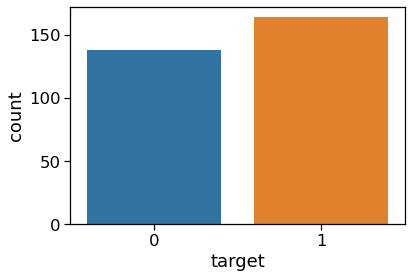

In [42]:
sns.countplot(df.target)
plt.show()

<AxesSubplot:ylabel='target'>

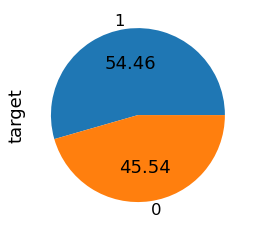

In [10]:
df.target.value_counts().plot.pie(autopct='%.2f')

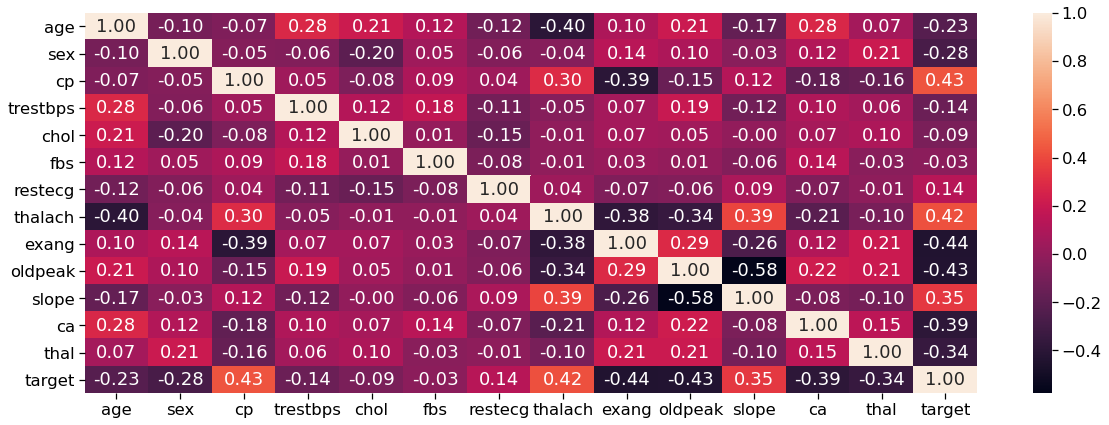

In [11]:
# Check Correlation

plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [12]:
df.corr()["target"]

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
target      1.000000
Name: target, dtype: float64

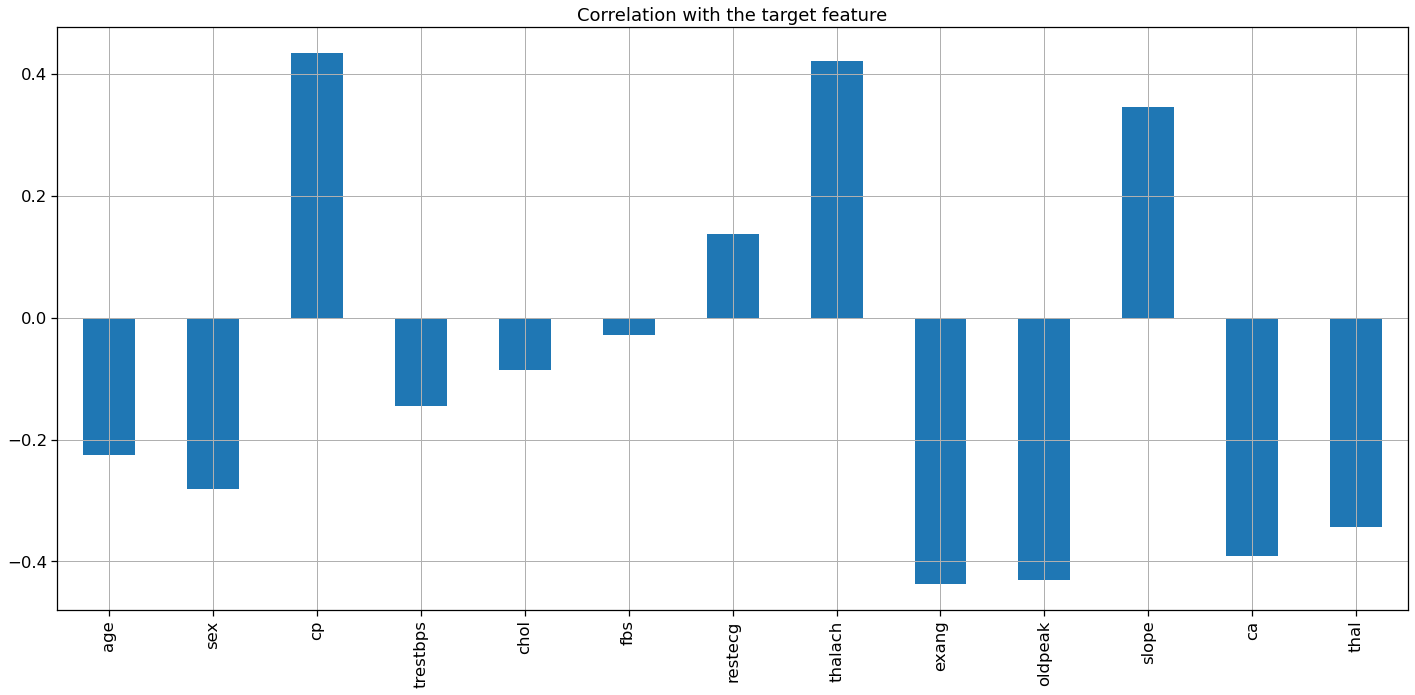

In [13]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(20, 10), 
                                                        title="Correlation with the target feature")
plt.tight_layout()

#### Inference: Insights from the above graph are:

1. Four feature( “cp”, “restecg”, “thalach”, “slope” ) are positively correlated with the target feature.
2. Other features are negatively correlated with the target feature.

So, we have done enough collective analysis now let’s go for the analysis of the individual features which comprises both univariate and bivariate analysis.

### Age Analysis

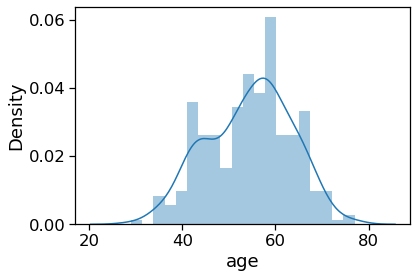

In [50]:
sns.distplot(df.age,bins=20)
plt.show()

In [15]:
# Binning age

df["Bin_age"] = pd.cut(df.age, [0,40,50,100], labels=["<40 years","40-50 years","50 above"])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,bin,Bin_age
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,40-50,50 above
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,40-50,<40 years
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,40-50,40-50 years
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,40-50,50 above
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,40-50,50 above


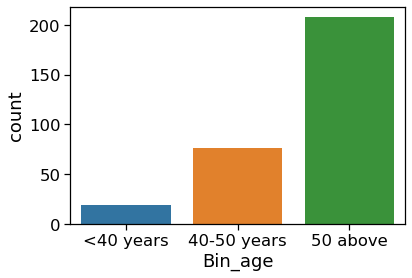

In [16]:
sns.countplot(df.Bin_age)
plt.show()

#### Inference

Here we can see that people with age 50+ is mostly affected by Heart problem.

Now,lets check the percentage of people affected.

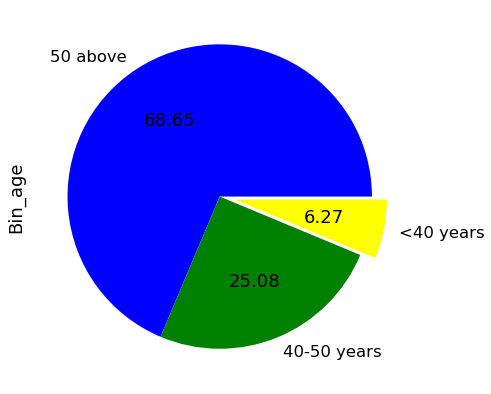

In [17]:
colors = ['blue','green','yellow']
explode = [0,0,0.1]
plt.figure(figsize=(7,7))

df.Bin_age.value_counts().plot.pie(autopct="%.2f",explode=explode,colors=colors)
plt.show()

#### Inference

Approx 69% of people with age above 50 is affected by heart disease.

In [18]:
df.sex = df.sex.map({0:"female",1:"male"})

In [19]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,bin,Bin_age
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1,40-50,50 above
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,1,40-50,<40 years


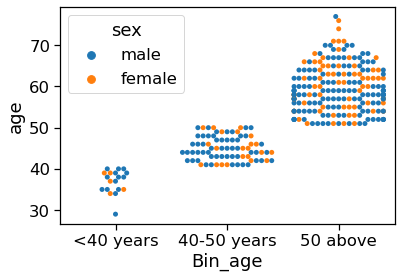

In [20]:
# Age Vs Sex

sns.swarmplot(x=df.Bin_age, y=df.age, hue=df.sex)
plt.show()

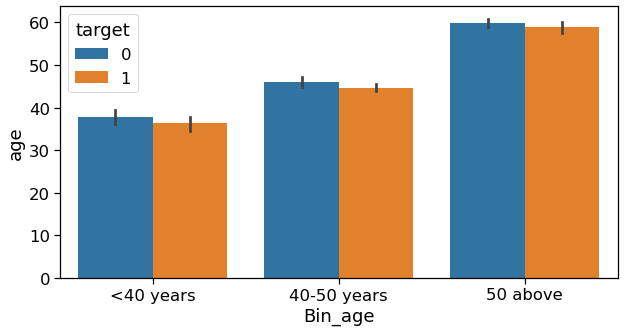

In [49]:
plt.figure(figsize=(10,5))
sns.barplot(x=df.Bin_age, y=df.age, hue=df.target)
plt.show()

In [22]:
df.groupby("sex")["target"].sum()

sex
female    72
male      93
Name: target, dtype: int64

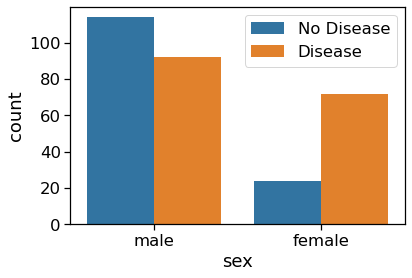

In [46]:
sns.countplot(data=df, x="sex",hue="target")
plt.legend(labels=["No Disease","Disease"])
plt.show()

#### Inference

Count of Male affected by heart problem is greater then female. 

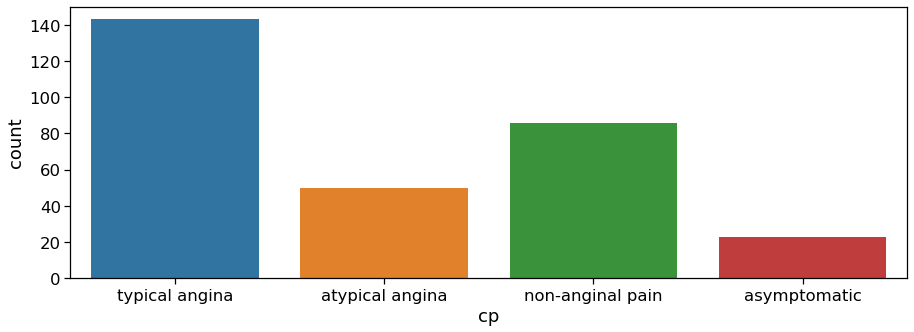

In [55]:
plt.figure(figsize=[15,5])
sns.countplot(df.cp)
plt.xticks([0,1,2,3],["typical angina","atypical angina","non-anginal pain","asymptomatic"])
plt.show()

#### Inference

Chest Pain type "typical angina" is most common between people.

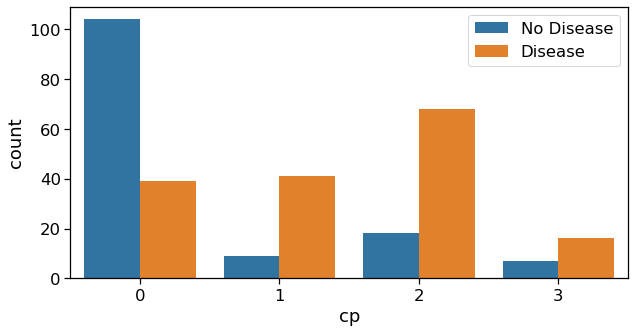

In [56]:
# CP VS Target

plt.figure(figsize=(10,5))
sns.countplot(df.cp, hue=df.target)
plt.legend(labels=["No Disease","Disease"])
plt.show()

#### Inference: From the above graph we can make some inferences,

1. People having the least chest pain are not likely to have heart disease.
2. People having severe chest pain are likely to have heart disease.

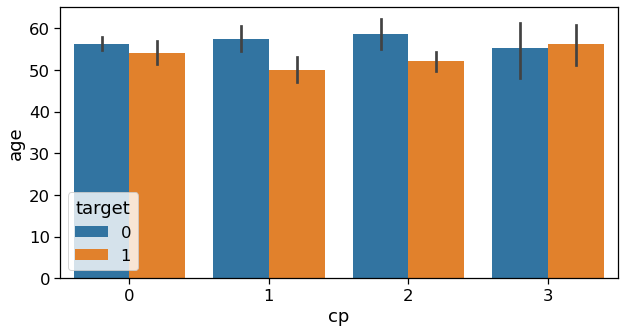

In [26]:
plt.figure(figsize=(10,5))

sns.barplot(df.cp, df.age, hue=df.target)
plt.show()

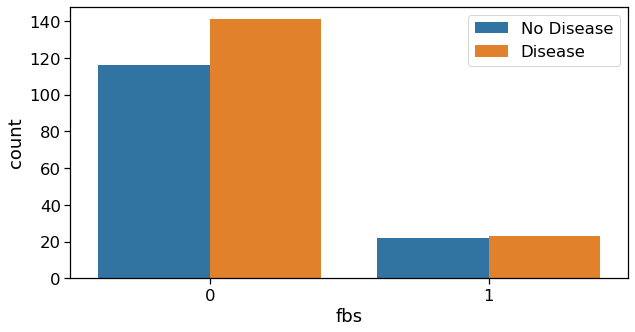

In [57]:
# Fasting blood sugar Vs Target

plt.figure(figsize=(10,5))
sns.countplot(df.fbs, hue=df.target)
plt.legend(labels=["No Disease","Disease"])
plt.show()

#### Inference

FBS>120 is considerd to be diabetes; from the above graph we can say that,higher nnumber of Heart disease patients are non-diabetes.

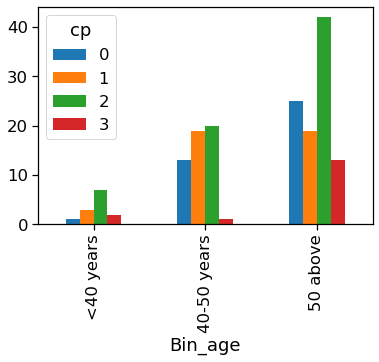

In [27]:
pd.pivot_table(data=df, values="target",index="Bin_age", columns="cp",aggfunc='sum').plot.bar()
plt.show()

#### Inference 

From the above graph we can say that, Elderly people are more likely to have chest pain.

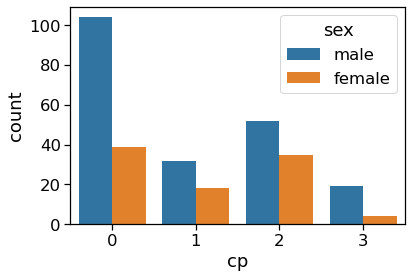

In [28]:
# Sex Vs Chest Pain

sns.countplot(df.cp, hue=df.sex)
plt.show()

#### Inference

Chest Pain is more common in Males as compared to Females.

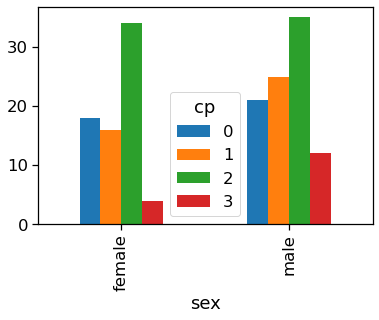

In [29]:
# Sex VS Chest Pain Vs Target

pd.pivot_table(data=df, values="target",index="sex", columns="cp",aggfunc='sum').plot.bar()
plt.show()

#### Inference

From the above graph we can say that, males are having large Heart problem as compared to Females.

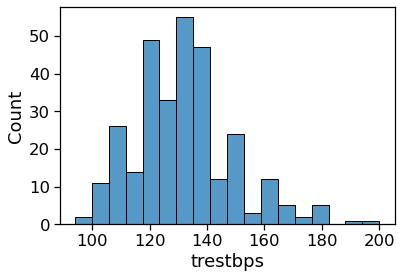

In [60]:
# trestbps distribution

sns.histplot(df.trestbps)
plt.show()

#### Inference

Most of the people having blood pressure between 120-130

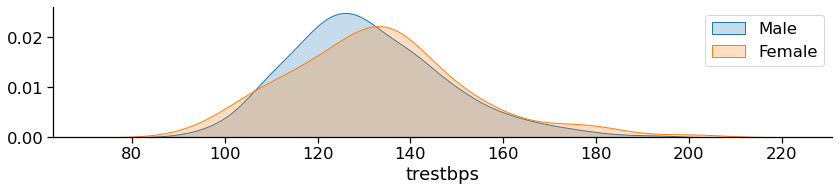

In [63]:
# Blood Sugar and Sex Ratio

g = sns.FacetGrid(df, hue="sex",aspect=4)
g.map(sns.kdeplot, "trestbps", shade=True)
plt.legend(labels=["Male","Female"])
plt.show()

#### Inference

Female have lower blood pressure as compare to Male. For Female it is around 120 and for Male it is around 138.

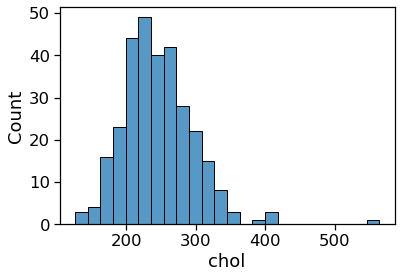

In [64]:
# chol distribution

sns.histplot(df.chol)
plt.show()

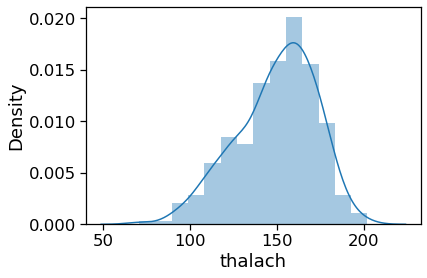

In [32]:
# thalach - Maximum heart rate achieved

sns.distplot(df.thalach)
plt.show()

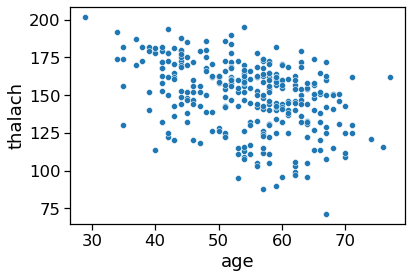

In [65]:
# Age VS thalach

sns.scatterplot(df.age, df.thalach)
plt.show()

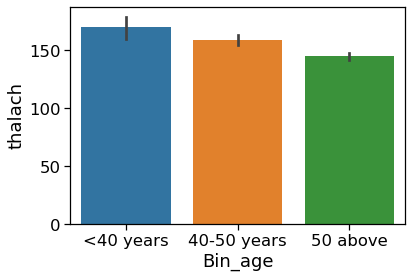

In [34]:
sns.barplot(df.Bin_age,df.thalach)
plt.show()

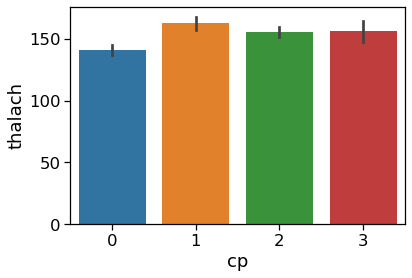

In [35]:
# CP VS thalach

sns.barplot(df.cp, df.thalach)
plt.show()

In [36]:
# Thal

df.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

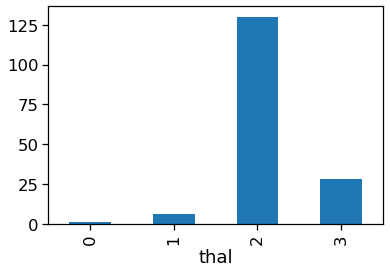

In [37]:
df.groupby("thal")["target"].sum().plot.bar()
plt.show()

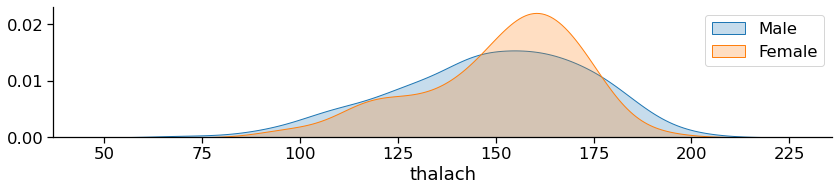

In [91]:
# thalach and Sex Ratio

g = sns.FacetGrid(df, hue="sex",aspect=4)
g.map(sns.kdeplot, "thalach", shade=True)
plt.legend(labels=["Male","Female"])
plt.show()